In [14]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

data = pd.read_csv("../data/waze_cleaned.csv")

In [16]:
data.shape

(14299, 12)

In [17]:
data.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [ ]:
sessions = data["sessions"]

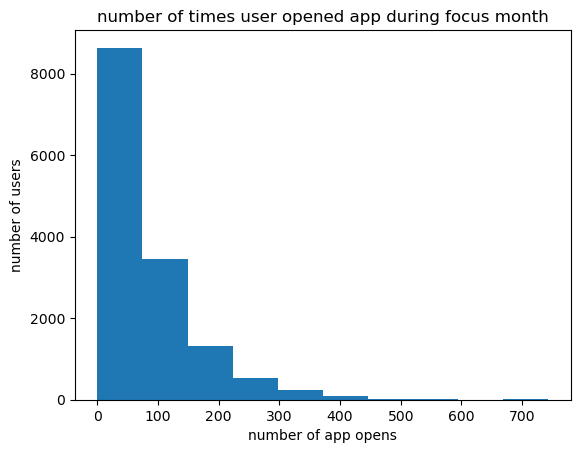

In [22]:
plt.hist(sessions)
plt.title("number of times user opened app during focus month")
plt.xlabel("number of app opens")
plt.ylabel("number of users");

consider using subplots (or seaborn facetgrid) to examine histograms comparing features. Or heatmap. Or pearson's r values 